In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
quantizer_term = 6
original_image = [
        [12,11,12],
        [12,12,12],
        [13,12,11]
]

In [3]:
fft_original_image = np.fft.fft2(original_image)

In [4]:
fft_original_image # imaginary array

array([[ 107.0+0.j        ,    2.0+0.j        ,    2.0+0.j        ],
       [  -1.0+0.j        ,    0.5+2.59807621j,   -1.0+0.j        ],
       [  -1.0+0.j        ,   -1.0+0.j        ,    0.5-2.59807621j]])

In [5]:
fft_original_image.real # real part

array([[ 107. ,    2. ,    2. ],
       [  -1. ,    0.5,   -1. ],
       [  -1. ,   -1. ,    0.5]])

In [6]:
np.fft.ifft2(fft_original_image).real # inverse over the transformed

array([[ 12.,  11.,  12.],
       [ 12.,  12.,  12.],
       [ 13.,  12.,  11.]])

In [7]:
quantized = np.divide(fft_original_image,[quantizer_term]) # quantized array

In [8]:
quantized # quantized array

array([[ 17.83333333+0.j       ,   0.33333333+0.j       ,   0.33333333+0.j       ],
       [ -0.16666667+0.j       ,   0.08333333+0.4330127j,  -0.16666667+0.j       ],
       [ -0.16666667+0.j       ,  -0.16666667+0.j       ,
          0.08333333-0.4330127j]])

In [9]:
np.around(np.absolute(quantized.real))

array([[ 18.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.]])

In [10]:
rounded_quantized = np.around(np.absolute(quantized))
reverse_quantized = np.multiply(rounded_quantized,[quantizer_term])
reverse_fft_quantized = np.around(np.fft.ifft2(reverse_quantized).real)

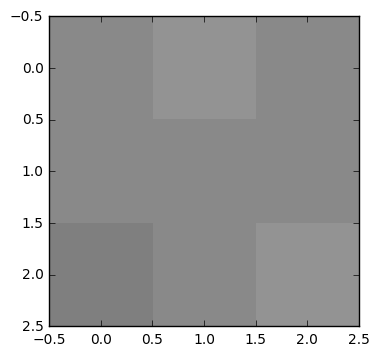

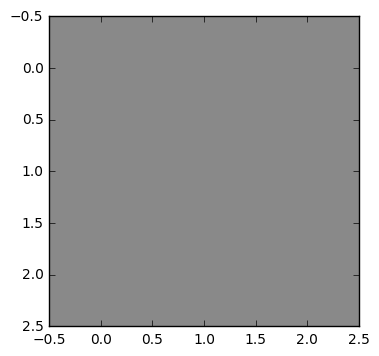

In [11]:
plt.imshow(original_image, interpolation='nearest',cmap=plt.cm.binary, vmax=26, vmin=0)
plt.show()

plt.imshow(reverse_fft_quantized, interpolation='nearest',cmap=plt.cm.binary, vmax=26, vmin=0)
plt.show()

# Original

In [12]:
print(np.array(original_image))

[[12 11 12]
 [12 12 12]
 [13 12 11]]


# Reversed quantized

In [13]:
print(reverse_fft_quantized)

[[ 12.  12.  12.]
 [ 12.  12.  12.]
 [ 12.  12.  12.]]


# Residual difference

In [14]:
print(np.absolute(np.subtract(original_image,reverse_fft_quantized)))

[[ 0.  1.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  1.]]
